### Example: Linear Regression

![LinearRegession](Img/PysparkLiR.png)

In [2]:
from pyspark.sql import SparkSession
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler

# Step 1: Initialize Spark session
spark = SparkSession.builder.appName("SimpleLinearRegression").getOrCreate()

# Step 2: Create a simple dataset
# Here, we use a small dataset with one feature and one label
data = [
    (1.0, 2.0),
    (2.0, 4.0),
    (3.0, 6.0),
    (4.0, 8.0),
    (5.0, 10.0)
]

# Define the schema as (feature, label)
columns = ["feature", "label"]

# Create a Spark DataFrame
df = spark.createDataFrame(data, columns)

# Step 3: Prepare the data for the linear regression model
# Convert the "feature" column into a vector column
vector_assembler = VectorAssembler(inputCols=["feature"], outputCol="features")
prepared_data = vector_assembler.transform(df).select("features", "label")

# Step 4: Create and train the linear regression model
linear_regression = LinearRegression(featuresCol="features", labelCol="label")
lr_model = linear_regression.fit(prepared_data)

# Step 5: Output the coefficients and intercept
print(f"Coefficients: {lr_model.coefficients[0]}")
print(f"Intercept: {lr_model.intercept}")

# Step 6: Make predictions using the model
# Create a DataFrame for the unseen data
# unseen_data = spark.createDataFrame([(3.3,)], ["feature"])  # Input feature value
# unseen_data = vector_assembler.transform(unseen_data)

# Use the trained model to predict
predictions = lr_model.transform(prepared_data )
predictions.show()

# Stop the Spark session
#spark.stop()

Coefficients: 2.000000000000002
Intercept: -6.908406818208612e-15
+--------+-----+------------------+
|features|label|        prediction|
+--------+-----+------------------+
|   [1.0]|  2.0|1.9999999999999953|
|   [2.0]|  4.0|3.9999999999999973|
|   [3.0]|  6.0|               6.0|
|   [4.0]|  8.0| 8.000000000000002|
|   [5.0]| 10.0|10.000000000000004|
+--------+-----+------------------+



Plotting Graph

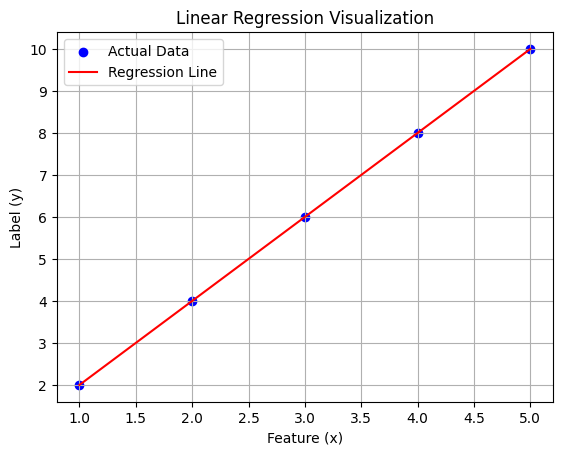

In [3]:
import matplotlib.pyplot as plt

# Step 1: Extract the data for visualization
# Collect predictions and actual labels from the PySpark DataFrame
predicted_data = predictions.select("features", "label", "prediction").collect()

# Separate the features, labels, and predictions into Python lists
features = [row["features"][0] for row in predicted_data]  # Extract the single feature (x values)
labels = [row["label"] for row in predicted_data]          # Actual labels (y values)
predictions = [row["prediction"] for row in predicted_data]  # Predicted labels (y_pred values)

# Step 2: Create a scatter plot of the actual data
plt.scatter(features, labels, color="blue", label="Actual Data")

# Step 3: Plot the regression line
plt.plot(features, predictions, color="red", label="Regression Line")

# Step 4: Customize the plot
plt.title("Linear Regression Visualization")
plt.xlabel("Feature (x)")
plt.ylabel("Label (y)")
plt.legend()

# Step 5: Show the plot
plt.grid(True)
plt.show()


### Example: Linear Regression 2

Slope (m): 0.8999999999999999
Intercept (b): 1.3000000000000005


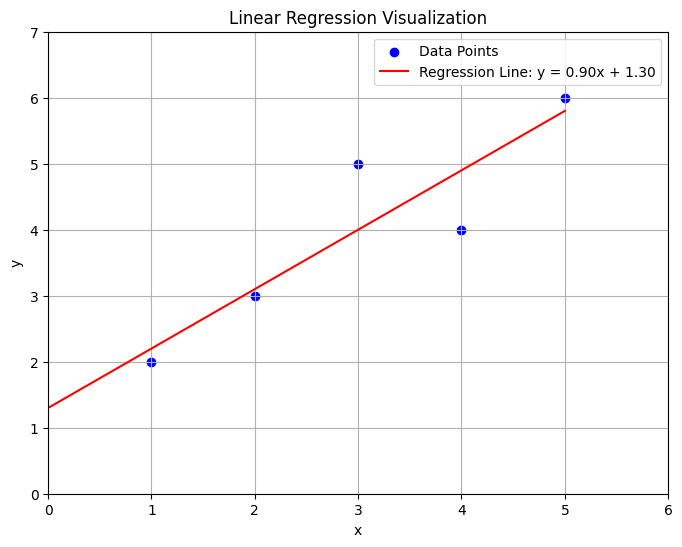

In [4]:
from pyspark.sql import SparkSession
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
import matplotlib.pyplot as plt
import numpy as np

# Initialize Spark session
spark = SparkSession.builder.appName("LinearRegressionVisualization").getOrCreate()

# Create a DataFrame with the data points
data = [(1.0, 2.0), (2.0, 3.0), (3.0, 5.0), (4.0, 4.0), (5.0, 6.0)]
df = spark.createDataFrame(data, ["x", "y"])

# Prepare the data for Linear Regression
assembler = VectorAssembler(inputCols=["x"], outputCol="features")
df = assembler.transform(df)

# Create a Linear Regression model
lr = LinearRegression(featuresCol="features", labelCol="y")

# Fit the model
model = lr.fit(df)

# Extract the slope and intercept
slope = model.coefficients[0]
intercept = model.intercept

print(f"Slope (m): {slope}")
print(f"Intercept (b): {intercept}")

# Collect the data points for visualization
x_values = np.array([row.x for row in df.select("x").collect()])
y_values = np.array([row.y for row in df.select("y").collect()])

# Generate the regression line
x_line = np.array([0, 5])  # Start from 0 to 5 (or any range you want)
y_line = slope * x_line + intercept

# Plot the data points and regression line
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, color="blue", label="Data Points")  # Plot data points
plt.plot(x_line, y_line, color="red", label=f"Regression Line: y = {slope:.2f}x + {intercept:.2f}")  # Plot regression line
plt.title("Linear Regression Visualization")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.xlim(0, 6)  # Start x-axis from 0
plt.ylim(0, 7)  # Start y-axis from 0
plt.show()

# Stop the Spark session
spark.stop()

Evaluate model

In [5]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Given data points
x = np.array([1, 2, 3, 4, 5])
y_actual = np.array([2, 3, 5, 4, 6])

# Model parameters
m = 0.9
b = 1.3

# Compute predictions
y_predicted = m * x + b

# Calculate evaluation metrics
mae = mean_absolute_error(y_actual, y_predicted)
mse = mean_squared_error(y_actual, y_predicted)
rmse = np.sqrt(mse)
r2 = r2_score(y_actual, y_predicted)

# Print results
print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")

MAE: 0.480
MSE: 0.380
RMSE: 0.616
R²: 0.810


### Example: Naive Bayes Classifier


In [6]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import NaiveBayes

# Step 1: Initialize Spark Session
spark = SparkSession.builder.appName("NaiveBayesClassifier").getOrCreate()

# Step 2: Create the dataset
data = [
    ("sunny", "hot", "high", "false", "N"),
    ("sunny", "hot", "high", "true", "N"),
    ("overcast", "hot", "high", "false", "P"),
    ("rain", "mild", "high", "false", "P"),
    ("rain", "cool", "normal", "false", "P"),
    ("rain", "cool", "normal", "true", "N"),
    ("overcast", "cool", "normal", "true", "P"),
    ("sunny", "mild", "high", "false", "N"),
    ("sunny", "cool", "normal", "false", "P"),
    ("rain", "mild", "normal", "false", "P"),
    ("sunny", "mild", "normal", "true", "P"),
    ("overcast", "mild", "high", "true", "P"),
    ("overcast", "hot", "normal", "false", "P"),
    ("rain", "mild", "high", "true", "N"),
]

columns = ["Outlook", "Temperature", "Humidity", "Windy", "Class"]

df = spark.createDataFrame(data, columns)

# Step 3: Encode categorical features and label
# Use StringIndexer to convert categorical variables into numeric indices
indexers = {col: StringIndexer(inputCol=col, outputCol=f"{col}_index").fit(df) for col in ["Outlook", "Temperature", "Humidity", "Windy", "Class"]}
for indexer in indexers.values():
    df = indexer.transform(df)

# Step 4: Assemble features into a single vector
assembler = VectorAssembler(
    inputCols=["Outlook_index", "Temperature_index", "Humidity_index", "Windy_index"],
    outputCol="features"
)
df = assembler.transform(df)

df.show()

+--------+-----------+--------+-----+-----+-------------+-----------------+--------------+-----------+-----------+-----------------+
| Outlook|Temperature|Humidity|Windy|Class|Outlook_index|Temperature_index|Humidity_index|Windy_index|Class_index|         features|
+--------+-----------+--------+-----+-----+-------------+-----------------+--------------+-----------+-----------+-----------------+
|   sunny|        hot|    high|false|    N|          1.0|              2.0|           0.0|        0.0|        1.0|[1.0,2.0,0.0,0.0]|
|   sunny|        hot|    high| true|    N|          1.0|              2.0|           0.0|        1.0|        1.0|[1.0,2.0,0.0,1.0]|
|overcast|        hot|    high|false|    P|          2.0|              2.0|           0.0|        0.0|        0.0|[2.0,2.0,0.0,0.0]|
|    rain|       mild|    high|false|    P|          0.0|              0.0|           0.0|        0.0|        0.0|        (4,[],[])|
|    rain|       cool|  normal|false|    P|          0.0|            

In [7]:
# Select final columns for training
training_data = df.select("features", "Class_index").withColumnRenamed("Class_index", "label")

# Step 5: Train Naive Bayes model
naive_bayes = NaiveBayes(smoothing=1.0, modelType="multinomial")
model = naive_bayes.fit(training_data)

# Step 6: Predict for unseen data X = <rain, hot, high, false>
unseen_data = spark.createDataFrame([("rain", "hot", "high", "false")], ["Outlook", "Temperature", "Humidity", "Windy"])
for col, indexer in indexers.items():
    if col != "Class":  # Skip label column indexer
        unseen_data = indexer.transform(unseen_data)

# Assemble features for unseen data
unseen_data = assembler.transform(unseen_data)

# Make prediction
prediction = model.transform(unseen_data)
prediction.select("features", "prediction").show()

# Step 7: Verify class mappings
print("Class Mappings:")
print(indexers["Class"].labels)

# Stop Spark Session
spark.stop()

+-------------+----------+
|     features|prediction|
+-------------+----------+
|(4,[1],[2.0])|       1.0|
+-------------+----------+

Class Mappings:
['P', 'N']
